In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv('customer_behavior_analytcis.csv')

In [52]:
df.columns

Index(['total_purchases', 'avg_cart_value', 'total_time_spent',
       'product_click', 'discount_counts', 'customer_id'],
      dtype='object')

In [53]:
features = ['total_purchases', 'avg_cart_value', 'total_time_spent','product_click', 'discount_counts']

# EDA

**First let's look for inconsistancies in the data**

In [54]:
df.isna().sum()

total_purchases     20
avg_cart_value      20
total_time_spent     0
product_click       20
discount_counts      0
customer_id          0
dtype: int64

In [55]:
# Firlst let's turn the customer_id into the dataframe index
df.set_index('customer_id', inplace=True)

In [56]:
df[df.isna().any(axis=1)]

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts
customer_id,,,,,
CM00097,NaN,NaN,117.04,NaN,0.0
CM00139,NaN,NaN,33.76,NaN,3.0
CM00212,NaN,NaN,42.70,NaN,0.0
CM00253,NaN,NaN,21.28,NaN,12.0
CM00294,NaN,NaN,47.80,NaN,2.0
CM00310,NaN,NaN,82.11,NaN,0.0
CM00317,NaN,NaN,55.19,NaN,0.0
CM00353,NaN,NaN,45.26,NaN,1.0
CM00409,NaN,NaN,22.95,NaN,10.0


**we'll keep these data aside for now**

In [57]:
df_na = df[df.isna().any(axis=1)]
df = df.dropna()

In [58]:
df.describe()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts
count,979.000000,979.000000,979.000000,979.000000,979.000000
mean,11.570991,75.457978,49.376966,28.237998,4.309499
std,7.016327,55.067835,32.785737,16.296384,4.514147
min,0.000000,10.260000,5.120000,4.000000,0.000000
25%,6.000000,33.130000,22.330000,16.000000,1.000000
50%,10.000000,49.380000,40.310000,21.000000,2.000000
75%,17.000000,121.255000,77.270000,45.000000,8.000000
max,32.000000,199.770000,119.820000,73.000000,21.000000


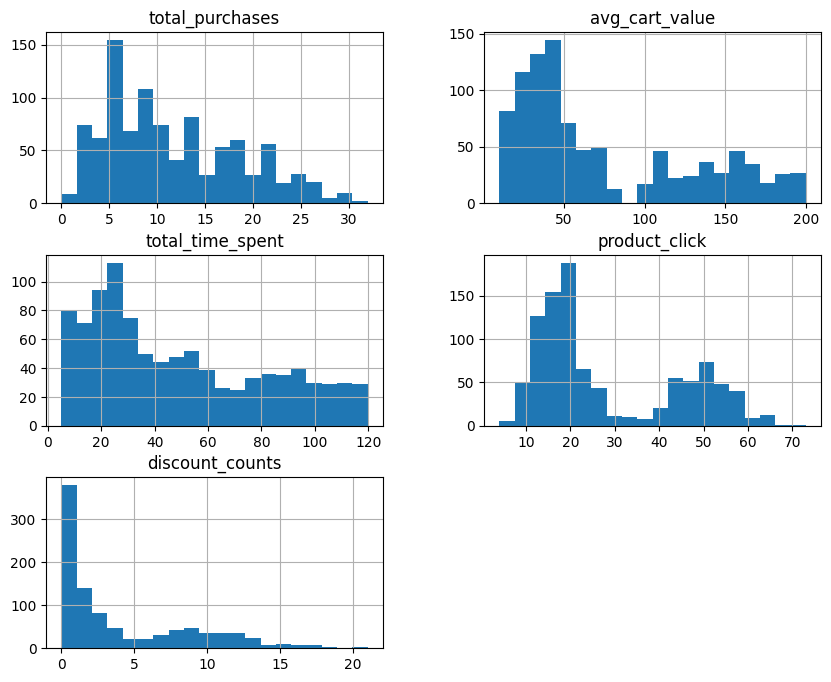

In [59]:
df.hist(figsize=(10, 8), bins=20)
plt.show()

Even though histograms are not balanced, it's acceptable since this is a classification problem

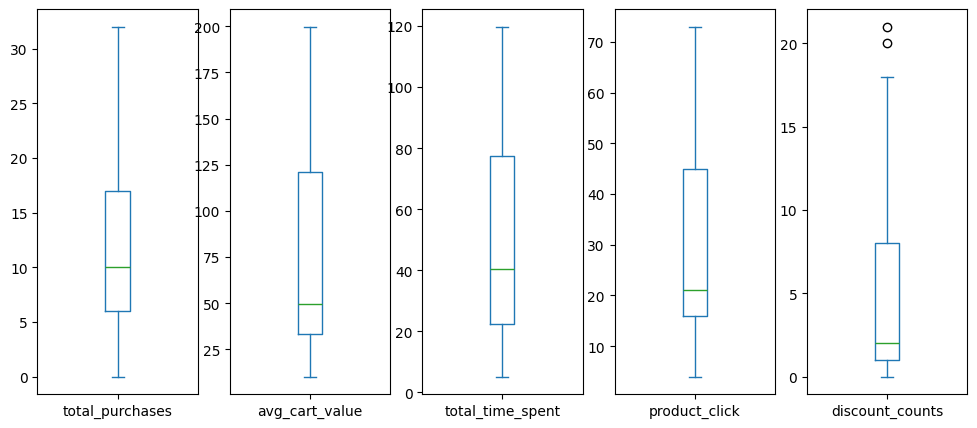

In [60]:
df.plot(figsize=(12, 5), subplots=True, kind='box')
plt.show()

regarding discunt_coutns there are some data in the outlier range, how every we'll the data as is

# Model Selection

We'll choose the **K-Means** clustering algorithm because of these reasons.
- We already know the number of clusters (k=3)
- There are not outliers in the dataset
- We are looking for well-defined segments, therefore it can be assumed that these clusters are well seperated

In order to use the algorithm first we should normalize the data so all the features are in the same scale

In [61]:
from sklearn.preprocessing import StandardScaler

X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Now let's perform clustering

In [62]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

By considering clustring guidelines we can see that Average Cart Values and Total Purchases can be indipendently used to identify the clusters. Therefore, let's plot the clustered data using them as axises to check whether the clustering was successful

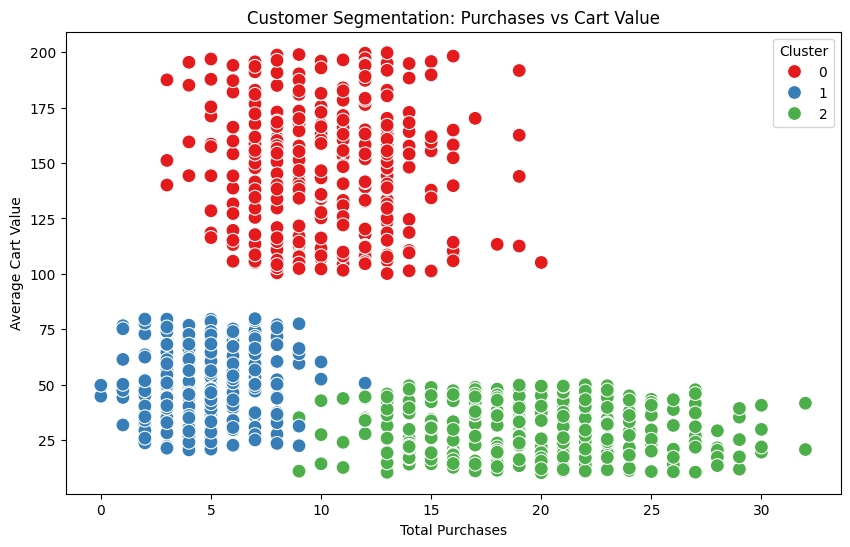

In [63]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['total_purchases'], y=df['avg_cart_value'], hue=df['cluster'], palette="Set1", s=100)
plt.title("Customer Segmentation: Purchases vs Cart Value")
plt.xlabel("Total Purchases")
plt.ylabel("Average Cart Value")
plt.legend(title="Cluster", loc='best')
plt.show()

We can see that clustering was successful. However let's try to make a 3d plot with another arbitory feature to chck we can cleary distinguish cluster 1 and cluster 2. Here we'll cloose total tiem spent as the third feature

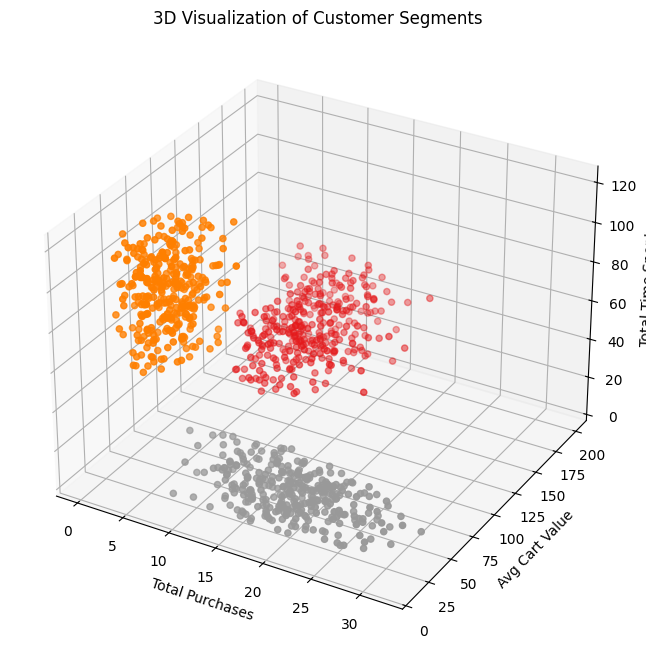

In [64]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['total_purchases'], df['avg_cart_value'], df['total_time_spent'], c=df['cluster'], cmap='Set1')
ax.set_xlabel('Total Purchases')
ax.set_ylabel('Avg Cart Value')
ax.set_zlabel('Total Time Spent')
ax.set_title('3D Visualization of Customer Segments')
plt.show()

We can see clear distinction between clusters. Now let's recognize the clusters.

These are the guidelines given

- cluster 0
    - total_purchases low 
    - avg_cart_value high
    - total_time_spent low 
    - product_click low 
    - discount_count low
- cluster 1
    - total_purchases low 
    - avg_cart_value low
    - total_time_spent high 
    - product_click high 
    - discount_count low
- cluster 1
    - total_purchases high 
    - avg_cart_value low
    - total_time_spent low 
    - product_click low 
    - discount_count high

In [65]:
# For that let's see the centroids of the clusters

centroids = kmeans.cluster_centers_
print(centroids)

# cluster 0
# cluster 1
# cluster 2
# [total_purchases, avg_cart_value, total_time_spent, product_click, discount_count]

[[-0.19901003  1.30576997 -0.27747567 -0.51219199 -0.51801285]
 [-0.95657089 -0.48016483  1.24318025  1.31866329 -0.72675686]
 [ 1.16083899 -0.81865391 -0.97418261 -0.8161324   1.24763934]]


Therefore we can see that
- cluster 0 -> High Spenders
- cluster 1 -> Window Shoppers
- cluster 2 -> Bargain Hunters

Before assigning lables to clustes, let's try to assign clusters to earlier excluded data depending on the centroid of the scaled avg_time_spent of the clusters as these excluded rows only have the avg_time_spent

In [66]:
scaled_centroids = kmeans.cluster_centers_
real_centroids = scaler.inverse_transform(scaled_centroids)
real_centroids
# [total_purchases, avg_cart_value, total_time_spent, product_click, discount_count]

array([[ 10.17538462, 147.32716923,  40.28436923,  19.89538462,
          1.97230769],
       [  4.86280488,  49.02984756,  90.11472561,  49.71646341,
          1.0304878 ],
       [ 19.71165644,  30.3995092 ,  17.45398773,  14.94478528,
          9.93865031]])

In [67]:
total_time_spent_centroids = real_centroids[:, 2]
total_time_spent_centroids

array([40.28436923, 90.11472561, 17.45398773])

In [68]:
def assign_cluster(value, centroids):
    # Calculate the absolute distance between the value and each centroid
    distances = np.abs(centroids - value)
    return np.argmin(distances)

df_na['cluster'] = df_na['total_time_spent'].apply(assign_cluster, centroids=total_time_spent_centroids)

In [69]:
df_na

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts,cluster
customer_id,,,,,,
CM00097,NaN,NaN,117.04,NaN,0.0,1
CM00139,NaN,NaN,33.76,NaN,3.0,0
CM00212,NaN,NaN,42.70,NaN,0.0,0
CM00253,NaN,NaN,21.28,NaN,12.0,2
CM00294,NaN,NaN,47.80,NaN,2.0,0
CM00310,NaN,NaN,82.11,NaN,0.0,1
CM00317,NaN,NaN,55.19,NaN,0.0,0
CM00353,NaN,NaN,45.26,NaN,1.0,0
CM00409,NaN,NaN,22.95,NaN,10.0,2


In [74]:
df_combined = pd.concat([df, df_na])
df = df_combined
df.sort_index(inplace=True)

Now we have a full clasified dataset. Let's assign labels

In [75]:
def label_cluster(row):
    if row['cluster'] == 0:
        return 'Bargain Hunter'
    elif row['cluster'] == 1:
        return 'High Spender'
    else:
        return 'Window Shopper'

df['customer_segment'] = df.apply(label_cluster, axis=1)

In [76]:
df.to_csv('customer_behavior_analytcis_segmentation.csv', index=True)